In [828]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA

In [829]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


from sklearn import metrics
from  sklearn.model_selection import train_test_split


from time import time

In [830]:

data = pd.read_csv('kNN.csv')


### Réaliser l'analyse exploratoire des données


In [831]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [832]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [833]:

print(f"size : {data.size}      shape : {data.shape}")

size : 18777      shape : (569, 33)


In [834]:
# vérifier si il y a des informations manquantes
data.isna().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [835]:
#la colonne Unnamed est completement vide, nous allons 
# l'enlever du data set
data = data.drop(['id',"Unnamed: 32"], axis=1)

In [836]:
data.describe()
# les statiques rapides de base, les données ne sont pas sur la même échelle, 
#une standadisation s'impose par la suite

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [837]:
data.shape

(569, 31)

In [838]:
data['diagnosis']= data['diagnosis'].astype('category').cat.codes
print("Encodage de M et B par ", data['diagnosis'].unique())

Encodage de M et B par  [1 0]


In [839]:
# définition des labels 'y' et X les features
y = data['diagnosis'].astype('category').cat.codes 

X = data.drop(["diagnosis"], axis=1)

#Y = Y.reshape(Y.shape[0],1)
y.shape

(569,)

In [840]:
import numpy as np
#y=np.array(y)
#y = y.reshape(y.shape[0],1)

In [841]:
#y.shape

### Visualiser les données et Déclarer le vecteur de caractéristiques et la variable cible

La variable cible ou target est: y = "diagostics".
le vecteur des caratéristiques ou les features : X sont le reste des varaibles.
Pour la visualisation des données, nous commençons par visualiser les variables qui possède une forte corrélation avec la target. Ce qui révèle la distinction de deux catégories bien distinctes.
Par contre quand la corrélation est faible, les données restent compactes 


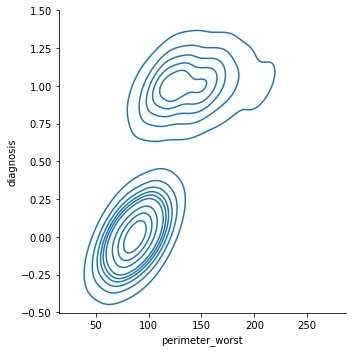

In [842]:
sns.displot(data=data, x= "perimeter_worst" , y="diagnosis", kind="kde")


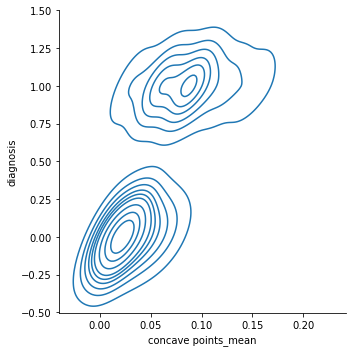

In [843]:
sns.displot( data =  data, x= "concave points_mean", y="diagnosis", kind="kde")
 

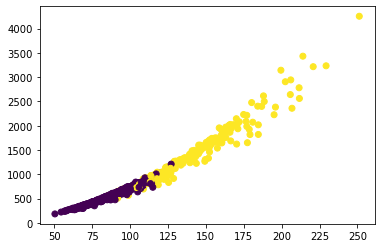

In [844]:
plt.scatter(data.perimeter_worst,data.area_worst, c=data.diagnosis)

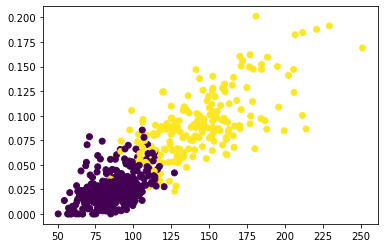

In [845]:
plt.scatter(data = data, x ="perimeter_worst",y = "concave points_mean", c=data.diagnosis) 

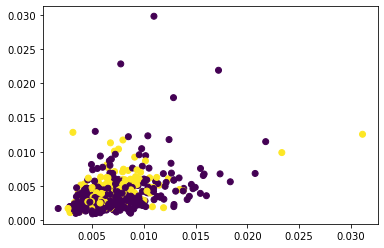

In [846]:
# visualiser 2 variables qui possèdent une trés faible correlation 
# avec le digostics
plt.scatter(data = data, x ="smoothness_se",y = "fractal_dimension_se", c=data.diagnosis) 

In [847]:


#  Réduction de dimension à 2 dimensions utilisation de la PCA seule
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
data_reduit = pca_model.fit_transform(X)



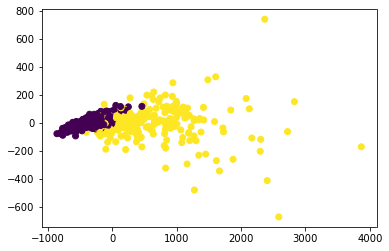

In [848]:
#  Réduction de dimension à 2 dimensions utilisation de la PCA seule
# pour visualiser nos données ds un  espace de 2 dimension

#pca_model = PCA(n_components=2)
#data_reduit = pca_model.fit_transform(X)

plt.scatter(data_reduit[:,0],data_reduit[:,1], c=y)

([<matplotlib.patches.Wedge at 0x7f5ace50c6d0>,
 [Text(0.428654794805217, 1.013042480299073, 'Maligne'),
  Text(-0.4286548896530974, -1.01304244016551, 'Bénigne')])

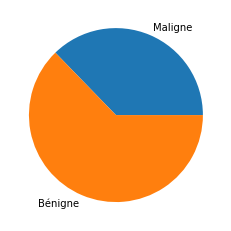

In [849]:
m= y[y== 1].size
b= y[y== 0].size
 
plt.pie([m, b], labels= ["Maligne","Bénigne"])

<AxesSubplot:>

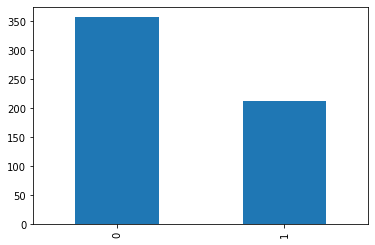

In [850]:
y.value_counts().plot.bar()

In [851]:
#la matrice de correlation 
matrice_corr = data.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.0,0.733,0.462,0.748,0.734,0.372,0.609,0.733,0.778,0.333,-0.0259,0.617,0.0194,0.63,0.714,-0.0522,0.381,0.47,0.489,-0.0923,0.201,0.788,0.477,0.796,0.787,0.426,0.607,0.706,0.782,0.397,0.311
radius_mean,0.733,1.0,0.341,0.998,1.0,0.149,0.498,0.646,0.76,0.12,-0.35,0.55,-0.144,0.566,0.738,-0.326,0.265,0.365,0.411,-0.241,-0.00841,0.979,0.315,0.972,0.979,0.126,0.491,0.596,0.727,0.175,0.0446
texture_mean,0.462,0.341,1.0,0.348,0.344,0.0246,0.266,0.343,0.307,0.11,-0.0593,0.364,0.451,0.387,0.395,0.037,0.264,0.287,0.239,0.00895,0.148,0.367,0.909,0.375,0.368,0.101,0.291,0.34,0.319,0.121,0.116
perimeter_mean,0.748,0.998,0.348,1.0,0.997,0.183,0.544,0.682,0.789,0.15,-0.305,0.56,-0.138,0.583,0.746,-0.311,0.309,0.402,0.442,-0.228,0.0324,0.981,0.323,0.979,0.981,0.157,0.535,0.632,0.758,0.199,0.089
area_mean,0.734,1.0,0.344,0.997,1.0,0.138,0.489,0.643,0.755,0.114,-0.358,0.553,-0.142,0.568,0.742,-0.327,0.26,0.362,0.406,-0.244,-0.0127,0.979,0.318,0.972,0.98,0.12,0.486,0.594,0.723,0.171,0.0388
smoothness_mean,0.372,0.149,0.0246,0.183,0.138,1.0,0.679,0.519,0.565,0.542,0.588,0.334,0.0913,0.331,0.296,0.339,0.392,0.355,0.439,0.151,0.413,0.203,0.0606,0.226,0.192,0.796,0.481,0.429,0.499,0.394,0.511
compactness_mean,0.609,0.498,0.266,0.544,0.489,0.679,1.0,0.897,0.848,0.552,0.499,0.507,0.0478,0.584,0.54,0.127,0.818,0.772,0.732,0.0984,0.621,0.543,0.255,0.592,0.532,0.579,0.901,0.838,0.825,0.45,0.689
concavity_mean,0.733,0.646,0.343,0.682,0.643,0.519,0.897,1.0,0.927,0.447,0.258,0.575,0.0513,0.646,0.644,0.0703,0.761,0.858,0.775,0.0228,0.514,0.682,0.336,0.722,0.677,0.489,0.85,0.939,0.905,0.384,0.542
concave points_mean,0.778,0.76,0.307,0.789,0.755,0.565,0.848,0.927,1.0,0.424,0.143,0.635,0.00871,0.68,0.727,0.0168,0.608,0.675,0.758,-0.0284,0.378,0.787,0.301,0.814,0.78,0.49,0.758,0.827,0.937,0.355,0.421
symmetry_mean,0.333,0.12,0.11,0.15,0.114,0.542,0.552,0.447,0.424,1.0,0.428,0.338,0.139,0.355,0.288,0.206,0.436,0.368,0.383,0.384,0.403,0.165,0.119,0.191,0.154,0.424,0.441,0.394,0.397,0.71,0.41




##### Principe de K-NN : dis moi qui sont tes voisins, je te dirais qui tu es !



###  Divisez les données en un ensemble d'entraînement et de test séparé


In [852]:
# We define  X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size =0.25, random_state=42)


In [853]:
# Uune première itération sans scaller les données
# juste pour avoir un point de repère
n_neig=3
model = KNeighborsClassifier(n_neighbors=n_neig) 
start = time()
model.fit(X_train,Y_train)
T3= time()-start

S3 = round(model.score(X_train,Y_train),3)
S3T = round(model.score(X_test,Y_test),3)
Y_pred = model.predict(X_test)

f1Score = round(f1_score(Y_test, Y_pred, average='weighted'),3)


T3 = round(T3,3)
print(f"K:{n_neig} Time: {T3}   Score_train :{S3} Score_test : {S3T} ")

print(classification_report(Y_test, Y_pred))


K:3 Time: 0.006   Score_train :0.951 Score_test : 0.93 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.91      0.91      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [854]:
#model.predict_proba(X_test)[:, 1] #x est une observation
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob[:10])
# la première colonne représente la probabilité  'p' qu'un  sujet
# se trouve dans la catégorie 1  et 2me colonne la probabilté
# qu'il soit dans la 2 éme catégorie, elle est égale à 
# 1-p
#Si P > 0.5  ===> prédiction classe (y =1 )  
#Si P > 0.5  ===> prédiction classe (y =0 )

[[0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [855]:
#Les coefficients sur la diagonale indique les éléments
#sont bien classés et les autres sont les vaux positifs.
conf = confusion_matrix(Y_test, model.predict(X_test))
conf

array([[84,  5],
       [ 5, 49]])

Equation of the precision and recall

Precision and recall are defined as :

Precision = TP / TP + FP

Recall = TP / TP + FN

where :

TP : True Positive FP : False Positive FN : False Negative

La précision permet de répondre à la question suivante: 
Quelle proportion d'identifications positives était effectivement correcte ? Ainsi, un modèle ne produisant aucun faux positif a une précision de 1,0 et plus un modèle produit de Faux positive (FP) est plus sa précision diminue.

Accuracy

Used as a statistical measure of how well binary claccification test correctly identifies or excludes a condition. That is, the accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.

Accuracy = (TP + TN)/(TP + TN + FP + FN)

where: TP = True positive; FP = False positive; TN = True negative; FN = False negative

It return the mean accuracy on the given test data and labels.


In [856]:
#la combinaison données scaled + KNeighborsClassifier(n_neighbors=3)
# On constate une am les résultats 

# Standardisation des données et et test_size =0.25

X_trainSS = StandardScaler().fit_transform(X_train)

n_neig=3
model = KNeighborsClassifier(n_neighbors=n_neig) 
model.fit(X_trainSS,y_train)

X_testSS = StandardScaler().fit_transform(X_test)

model.fit(X_testSS,Y_test)

y_pred= model.predict(X_testSS)

S3 = round(model.score(X_trainSS,Y_train),3)
S3T = round(model.score(X_testSS,Y_test),3)
Y_pred = model.predict(X_testSS)

f1Score = round(f1_score(Y_test, Y_pred, average='weighted'),3)


T3 = round(T3,3)
print(f"K:{n_neig} Time: {T3}   Score_train :{S3} Score_test : {S3T} ")

print(classification_report(Y_test, Y_pred))


K:3 Time: 0.006   Score_train :0.946 Score_test : 0.944 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        89
           1       0.93      0.93      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Les premiers résultats sans aucun preporcessing et surl'ensemble des données du data set donnent des scores satisfaisants. Il seront utilisées pour la comparaison avec les étapes suivantes
Dans la prochaine étapes nous allons suivre 2 pistes.
1. Définition du nombre du Kneigbord optimal.
2. Reduction des dimensions en utilisant Kmeans, data scaled, dataKneigbord en utilisant les pipes lines
3. Elimination des features qui ont une faible correlation avec la target
4. le recours à la Cross Validation, GridSearchCV si le temps le permet

#### Détermination du Définition du nombre du Kneigbord optimal : réglage des hyperparamètres
#####  a - recours à la Cross Validation
Le principe de la Cross Validation est le suivant :
- Il s'agit de découper le set_train  en N découpe.
- Entrainer le modèle sur les N-1 découpe (set_train) et le test sur la découpe restante(set_test).
- refaire l'étape 2 avec N configurations possibles, en choissant à chaque fois un set_test différent. 
- Au final, la moyenne est faite sur N score obtenu.
De cette manière, si on veut choisir entre deux modèles, le choix se fixera sur celui qui aurait obtenu la moyenne du meilleur score.

Il existe plusieurs manière de decouper en set-train. Celle implementait par défaut est le straitiedKfold. Il y a aussi lKfold, le shuffleSplit..
Elles sont détaillées sur Cross Validation Splitter Classes.
Pour l'utiliser dans notre cas, il suffit aprés avoir importer 
de préciser ;
cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5)
cv : est le nombre de split
K : le nombre de KNeighbors
et on peut aussi precessing le scoring. On utilsera celle par défaut l'accuracy.


La validation Curve est très utile pour repérer l'overfitting
Un modèle "overtfit" quand les erreurs sur le train_set diminuent , mais celle sur le test_set augmentent. Le modèle s'est trop perfectionné le train_set et a perdu le sens de la généralisation.
On général, on est en présence d'un trés bon score sur le train set et un mauvais score sur le test set. 
Nous essayerons par la suite k = 3 et 7.
Il existe aussi d'autres hyper_paramètres à optimiser dans le cadre KNeighborsClassifier (la distance par exemple). Nous ferons appelle à la GridSearchCv

Text(0.5, 0, 'KNeighbors')

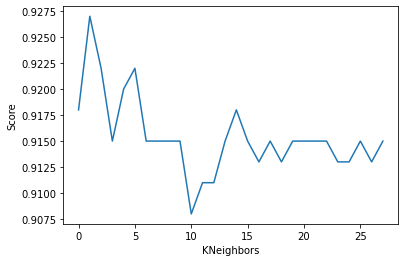

In [857]:
#determination du nombre de Kneighbord optimal avec la 
# cross_val_score
valScore =[]
for k in range(2,30) :
    S = round(cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=10, scoring='accuracy').mean(),3)
    valScore.append(S)
plt.plot(valScore)
plt.ylabel('Score')
plt.xlabel('KNeighbors')
#plt.legend()

Le nombre de voisin optimal est le nombre = 5
Nous continuerons à tester avec un k dans un interval

##### b recours à la Validation Curve
C'est une fonction Scklearn qui teste toutes les valeurs pour un hyper paramètre donnée. Elle permet ainsi de calcluer le score sur le set_train et les set_test.

In [858]:
from sklearn.model_selection import validation_curve

In [859]:
model = KNeighborsClassifier()
CV= 10
k =  np.arange(2,30)
train_set, val_set = validation_curve(model, X_train,Y_train,"n_neighbors",k,cv = CV)

/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass param_name=n_neighbors, param_range=[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29] as keyword args. From version 0.25 passing these as positional arguments will result in an error



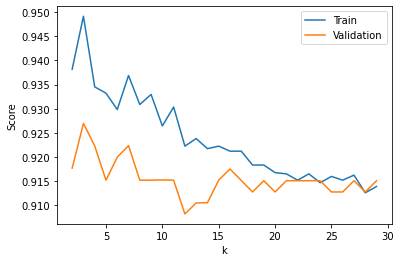

In [860]:
plt.plot(k,train_set.mean(axis=1), label= "Train")
plt.plot(k,val_set.mean(axis=1), label="Validation")
plt.xlabel("k")
plt.ylabel("Score")
plt.legend()

/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass param_name=n_neighbors, param_range=[2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error



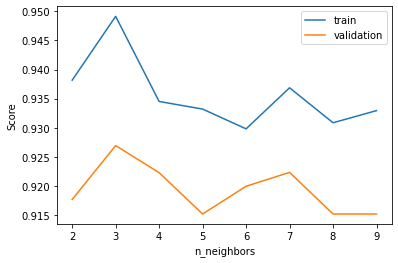

In [861]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(2,10)
train_score , val_score = validation_curve(model,X_train,Y_train,'n_neighbors',k, cv = CV, scoring='accuracy')
TSM = train_score.mean(axis=1)

#print(TSM,3)
plt.plot(k,train_score.mean(axis=1),label = "train")
plt.plot(k,val_score.mean(axis=1),label = "validation")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.legend()

In [862]:
# Reduction des dimensions et détermination du n_components optimal
# Nous commençons avec le nombre de 10
PCA = PCA(n_components=10)
data_reduit10 = PCA.fit_transform(X)

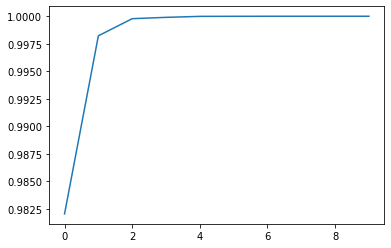

In [863]:
# Le pourcentage de variance préservé pour chaque composante
plt.plot(np.cumsum(PCA.explained_variance_ratio_))


In [864]:

from sklearn.preprocessing import StandardScaler


2. La standardisation : StandardScaler

La deuxième technique de normalisation est la Standardisation de tel sorte que chaque X est une moyenne nulle est un écrat type égale à 1

Xscaled = X - X.mean / X.std


In [865]:
# La standardisation des données 
#X_trainSS = StandardScaler().fit_transform(X_train)
#X_testSS = StandardScaler().fit_transform(X_test)
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [867]:
# Utilisation de pipeline pour tester différentes combinaison

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size =0.25, random_state=42)



pipe1 = Pipeline([
    ('SS', StandardScaler()),
    ('kNeig_3', KNeighborsClassifier(n_neighbors=3))
    ])

pipe2 = Pipeline([
    ('SS', StandardScaler()),
    ('kNeig_7', KNeighborsClassifier(n_neighbors=7))
    ])

pipe3 = Pipeline([
   # ('PCA2', PCA(n_components=4)),
    ('kNeig_3', KNeighborsClassifier(n_neighbors=3))
    ])

pipe4 = Pipeline([
    ('kNeig_7', KNeighborsClassifier(n_neighbors=7))
    ])

pipe5 = Pipeline([
    ('kNeig_3', KNeighborsClassifier(n_neighbors=10))
    ])
pipe6 = Pipeline([
    ('SVC', LinearSVC(max_iter=1500))
    ])
pipe7 = Pipeline([
    ('SS', StandardScaler()),
    ('SVC', LinearSVC(max_iter=1500))
    ])

                 
# liste time ,  f1_score, pipeline

t = []
f1Score = []
ScoreTR = []
ScoreTS= []
P = []
R = []

pipes = [ pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7]

for pipe in pipes:
    
    # Learn
    start = time()
    pipe.fit(X_train, Y_train)
    t1 = time() - start
    
    # predict and save results evaluation
    y_pred = pipe.predict(X_test)
    
   
      
    f1 = f1_score(Y_test, y_pred, average='weighted')
    S = round(pipe.score(X_train,Y_train),3)
    ST = round(pipe.score(X_test,Y_test),3)
    p1 = round(metrics.precision_score(Y_test, y_pred),4)
    r1 = round(metrics.recall_score(Y_test, y_pred),4)
    
    # save time and scores
    t.append(round(t1,3))
    f1Score.append(round(f1,3))
    ScoreTR.append(round(S,3))
    ScoreTS.append(round(ST,3))
    P.append(round(p1,3))
    R.append(round(r1,3))
    
time_f = time()- start
names = ["SS+kNeig_3", "SS+KNeig_7", "kNeig_3", "kNeig_7","kNeig_10","SVC","SS+SVC"]  
# mettre les résultats ds un tableau

print("temps total :", round(time_f,3))

#mettre les résultats d'un dictionnaire et le convertir ds un dataframe
dict_result = {}
dict_result ['Pipe'] = names
dict_result ['Time'] = t
dict_result ['f1_score'] = f1Score
dict_result ['Train Score'] = ScoreTR
dict_result ['Test Score'] = ScoreTS
dict_result ['Precision'] = P
dict_result ['Recall'] = R

df = pd.DataFrame.from_dict(dict_result)
#df.to_csv('result1.csv')
#df1 = pd.read_csv('result1.csv')
df

temps total : 0.018


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



,Pipe,Time,f1_score,Train Score,Test Score,Precision,Recall
0,SS+kNeig_3,0.011,0.958,0.984,0.958,0.944,0.944
1,SS+KNeig_7,0.007,0.958,0.967,0.958,0.944,0.944
2,kNeig_3,0.003,0.930,0.951,0.930,0.907,0.907
3,kNeig_7,0.003,0.958,0.937,0.958,0.962,0.926
4,kNeig_10,0.003,0.965,0.923,0.965,0.980,0.926
5,SVC,0.043,0.950,0.920,0.951,1.000,0.870
6,SS+SVC,0.009,0.965,0.988,0.965,0.930,0.982


In [868]:
# comaparaison des performances des cinq classifiers selon les différentes metrics
import plotly.graph_objs as go

#from plotly.offline import init_notebook_mode, iplot, plot
#import plotly as py


figPipe = go.Figure()
figPipe.add_trace(go.Scatter(x=df["Pipe"], y=df["f1_score"],
                    mode='lines',
                    name='f1_score'))
figPipe.add_trace(go.Scatter(x=df["Pipe"], y=df["Train Score"],
                    mode='lines+markers',
                    name='Train Score'))
figPipe.add_trace(go.Scatter(x=df["Pipe"], y=df["Test Score"],
                    #mode='lines+markers',
                    name='Test Score'))
figPipe.add_trace(go.Scatter(x=df["Pipe"], y=df["Precision"],
                    mode='lines',
                    name='Precision'))
figPipe.add_trace(go.Scatter(x=df["Pipe"], y=df["Recall"],
                    mode='lines',
                    name='Recall'))






In [869]:
# Tester la combinaison des données standardisées + KNeighborsClassifier(n_neighbors=3)
#  sans Pipeline.
# On constate que le pipeline améliore les résultats 

# Standardisation des données et et test_size =0.25

X_trainSS = StandardScaler().fit_transform(X_train)

n_neig=3
model = KNeighborsClassifier(n_neighbors=n_neig) 
model.fit(X_trainSS,y_train)

X_testSS = StandardScaler().fit_transform(X_test)

model.fit(X_testSS,Y_test)

y_pred= model.predict(X_testSS)

S3 = round(model.score(X_trainSS,Y_train),3)
S3T = round(model.score(X_testSS,Y_test),3)
y_pred_SS_K3 = model.predict(X_testSS)

f1Score = round(f1_score(Y_test, y_pred, average='weighted'),3)


T3 = round(T3,3)
print(f"K:{n_neig} Time: {T3}   Score_train :{S3} Score_test : {S3T} ")

y_pred_prob = model.predict_proba(X_test)[0:10]

print(classification_report(Y_test, Y_pred))



K:3 Time: 0.006   Score_train :0.946 Score_test : 0.944 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        89
           1       0.93      0.93      0.93        54

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



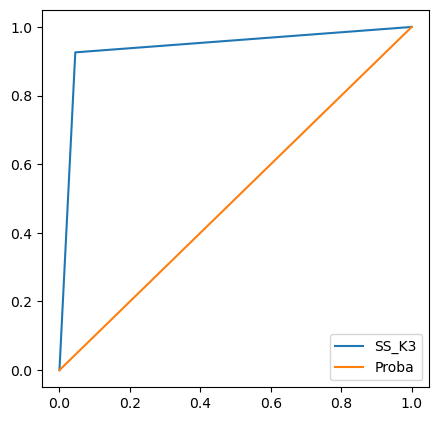

In [870]:
y_pred_1 =model.predict_proba(X_test)[:, 1]
fpr_SS_K3, tpr_SS_K3, thresholds_SS_K3 = roc_curve(y_test, y_pred_SS_K3)
plt.figure(figsize = (5,5),dpi =  100)
plt.plot(fpr_SS_K3, tpr_SS_K3, label = 'SS_K3')
plt.plot([0,1], [0,1], label ='Proba' )


plt.legend()
plt.show()



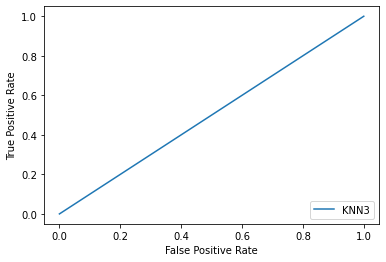

In [871]:
# Tester la combinaison données scaled + KNeighborsClassifier(n_neighbors=3)
svc_disp = plot_roc_curve(model, X_test, Y_test, label = "KNN3")
plt.show()


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



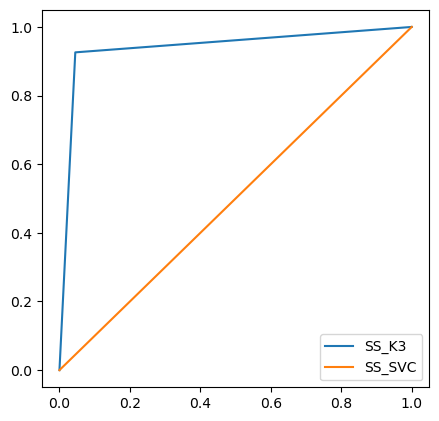

In [872]:
from sklearn.metrics import roc_curve, auc

# StandardScaler() + LinearSVC

pipe7 = Pipeline([
    ('SS', StandardScaler()),
    ('SVC', LinearSVC(max_iter=500))
    ])

pipe7.fit(X_train, Y_train)

y_pred_SS_SVC = pipe.decision_function(X_test)

fpr_SS_SVC, fpr_SS_SVC, thresholds_SS_SVC = roc_curve(y_test, y_pred_SS_SVC)

#auc_SS_SVC = auc(fpr_SS_SVC, tpr_SS_SVC)

plt.figure(figsize = (5,5),dpi =  100)
plt.plot(fpr_SS_K3, tpr_SS_K3, label = 'SS_K3')
plt.plot(fpr_SS_SVC, fpr_SS_SVC, label = 'SS_SVC')

plt.legend()
plt.show()



In [873]:
#train_set, val_set = validation_curve(model, X_train,Y_train,"n_neighbors",k,cv = CV)



/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass param_name=n_neighbors, param_range=[2 3 4 5 6 7 8 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error



https://scikit-learn.org/stable/modules/cross_validation.html


https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py